# **HR Analytics Project**

### **1.Loading the Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv",index_col=[0])

In [3]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## **2.Checking basic details**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                  

In [5]:
df.shape

(1470, 34)

In [6]:
df.describe()

,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

## **3.EDA**

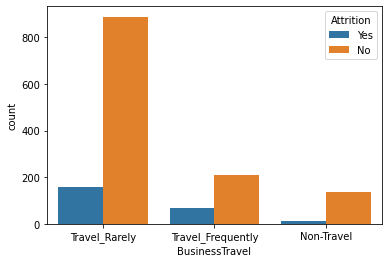

In [8]:
sns.countplot(x='BusinessTravel',data=df,hue='Attrition')

PEOPLE WHO PLANED TO TRAVEL_RARELY ARE MOSTLY SELECTED

In [9]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

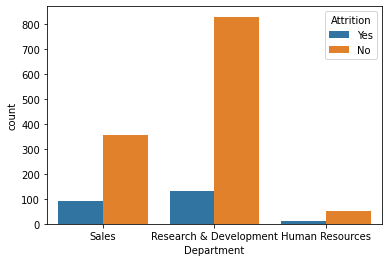

In [10]:
sns.countplot(x='Department',data=df,hue='Attrition')

PEOPLE IN R AND D DEPARTMENT ARE SELECTED HIGHLY

In [11]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

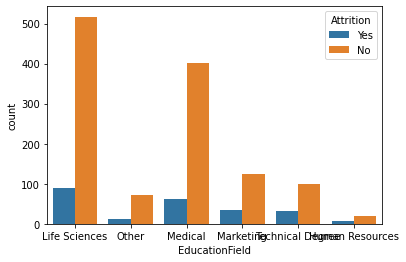

In [12]:
sns.countplot(x='EducationField',data=df,hue='Attrition')

In [13]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

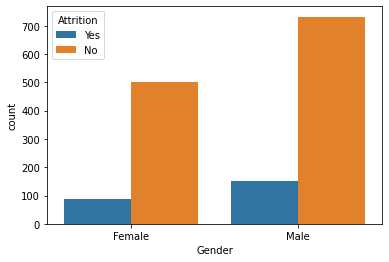

In [14]:
sns.countplot(x='Gender',data=df,hue='Attrition')

In [15]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

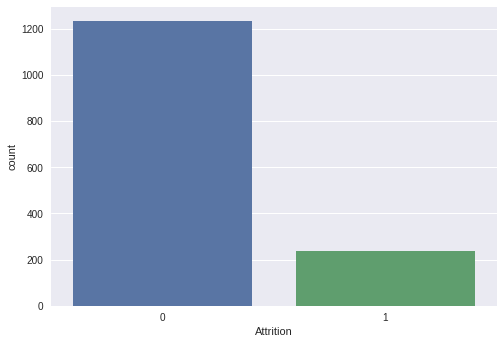

In [98]:
sns.countplot(x='Attrition',data=df)

In [16]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

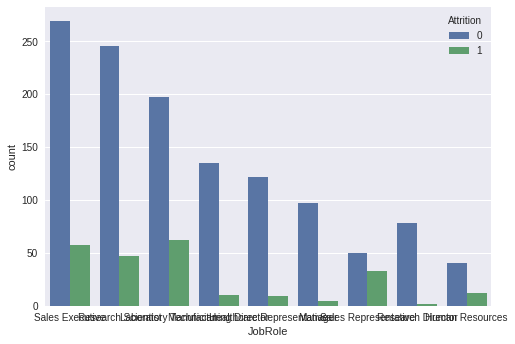

In [99]:
sns.countplot(x='JobRole',data=df,hue='Attrition')

In [17]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

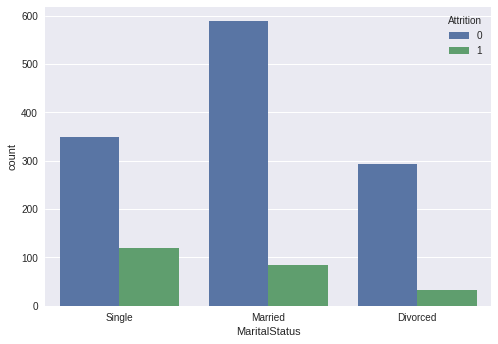

In [100]:
sns.countplot(x='MaritalStatus',data=df,hue='Attrition')

In [18]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

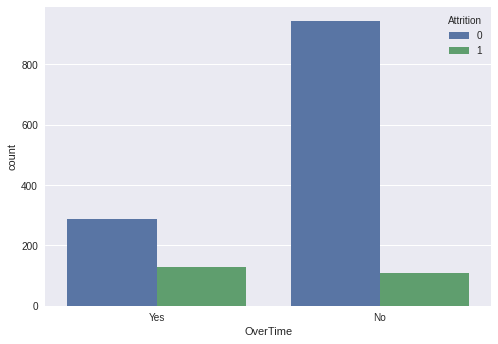

In [101]:
sns.countplot(x='OverTime',data=df,hue='Attrition')

In [19]:
df['EmployeeNumber'].describe()

count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64

SINCE EMPLOYE NO IS JUST A ID REMOVING THAT ATTRIBUTE

In [20]:
df = df.drop(['EmployeeNumber'],axis=1)

In [21]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

ALL THE DATA PRESENT IN THE TABLE ARE HAVING OVER AGE =Y SO REMOVING THAT ATTRIBUTE 

In [22]:
df['Over18'].describe()

count     1470
unique       1
top          Y
freq      1470
Name: Over18, dtype: object

In [23]:
df = df.drop(['Over18'],axis=1)

In [24]:
df['EmployeeCount'].describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

ALL THE DATA PRESENT IN THE TABLE ARE HAVING OVER EMPLOYEECOUNT = 1 SO REMOVING THAT ATTRIBUTE 

In [25]:
df = df.drop(['EmployeeCount'],axis=1)

In [26]:
df['StandardHours'].describe()

count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

ALL THE DATA PRESENT IN THE TABLE ARE HAVING OVER StandardHours = 80 SO REMOVING THAT ATTRIBUTE 

In [27]:
df = df.drop(['StandardHours'],axis=1)

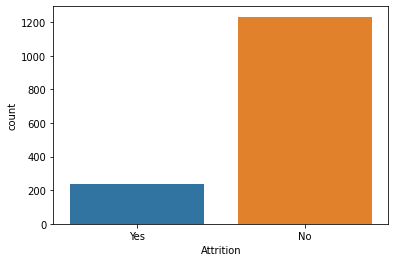

In [29]:
sns.countplot(x='Attrition',data=df)

DATA IMBALANCE IS PRESENT NEED TO SOLVE DATA IMBALENCING

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 41 to 34
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus            

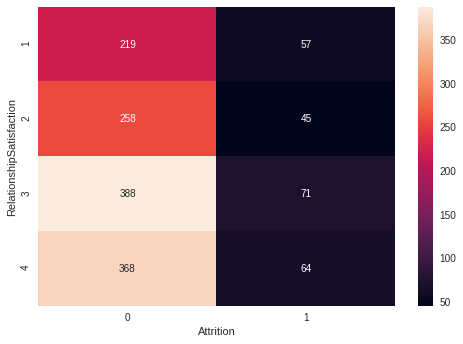

In [107]:
group=df.groupby(['RelationshipSatisfaction','Attrition'])
RelationshipSatisfaction_Attrition=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(RelationshipSatisfaction_Attrition, annot=True, fmt='d')

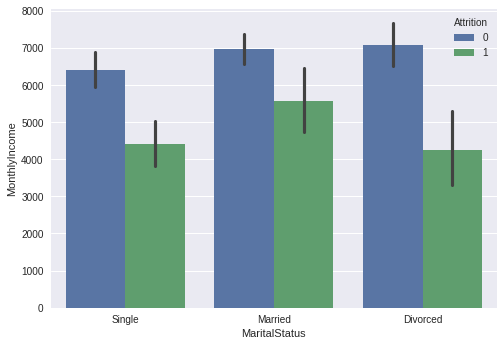

In [108]:
# Barplot Display distribution of data across all level of category
sns.barplot(x='MaritalStatus',y='MonthlyIncome',hue='Attrition',data=df)

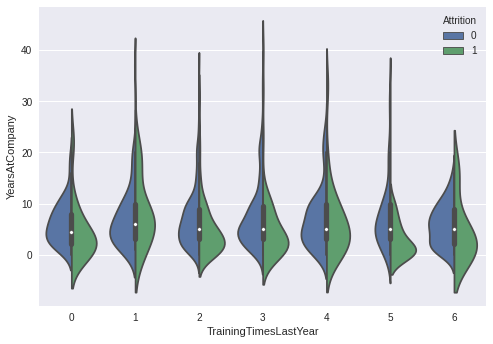

In [110]:
sns.violinplot(x='TrainingTimesLastYear',y='YearsAtCompany',hue='Attrition',data=df, split=True)

Graphical Represention Conclusion:

According to the data,the average total turnover of all the companies is 18 percent & also indicates Good rentention rate of employees in companies.

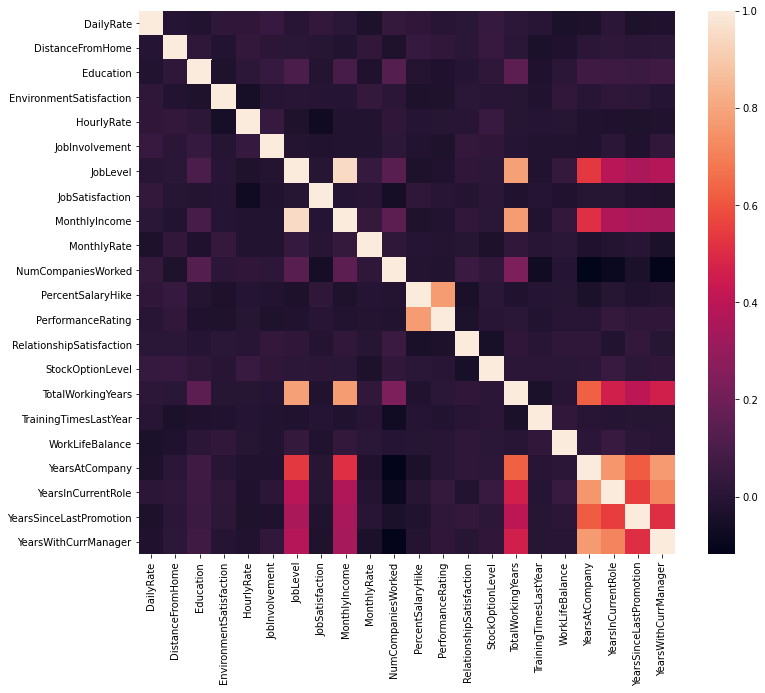

In [30]:
df_corr=df.corr()
plt.figure(figsize=[12,10])
sns.heatmap(df_corr)

SINCE WE CANNOT ABLE TO SEE THE CORRILATION OF DATA WITH DEPENDENT VARIABLE. WE ARE CONVERTING INTO NUMERIC

In [31]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Attrition']=LE.fit_transform(df['Attrition'])

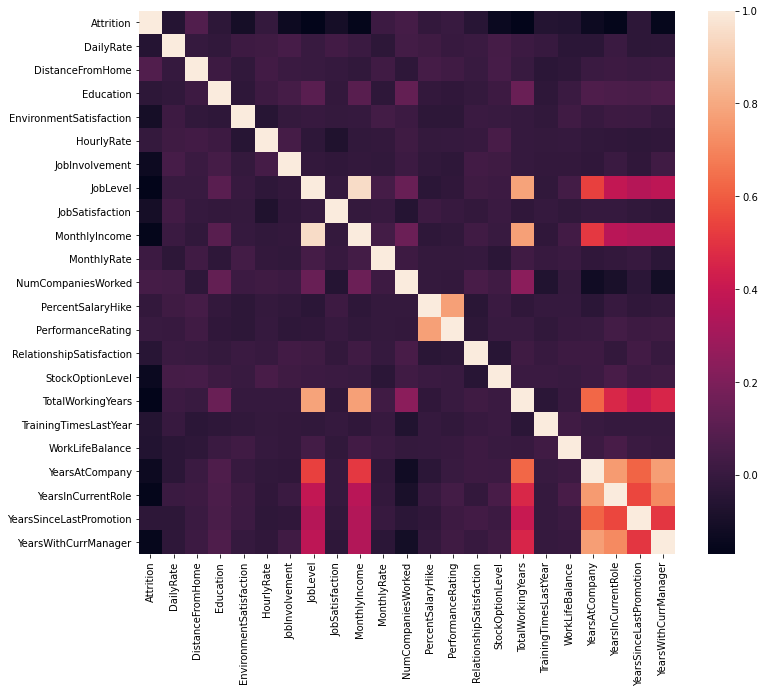

In [32]:
df_corr=df.corr()
plt.figure(figsize=[12,10])
sns.heatmap(df_corr)

## **4. Data pre-processing**

In [33]:
print(df.isnull().sum())

Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [34]:
df.skew()

Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

### **SKEWNESS IS NOT HIGH.**

**SINCE THE DATA IS VERY SMALL IF WE PERFORM OUTLIER REMOVEL THE DATA LOSS WILL BE HIGH SO NOT PREFORMING SKEWNESS REMOVAL OR OUTLIER REMOVAL TECHNIQUE**

## **TEST TRAIN SPLIT**

In [35]:
x= df.drop(columns='Attrition')
y= df['Attrition']

In [36]:
x.shape

(1470, 29)

In [37]:
y.shape

(1470,)

### **ENCODING**

In [38]:
#x= df.drop(columns='Attrition')
#y= df['Attrition']
x= pd.get_dummies(x, prefix_sep="_")
x.head()

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [39]:
x.shape

(1470, 50)

In [40]:
y.head()

Age
41    1
49    0
37    1
33    0
27    0
Name: Attrition, dtype: int64

In [41]:
y.shape

(1470,)

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [43]:
x_train.describe()

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,799.030612,9.232143,2.904762,2.721939,66.041667,2.727041,2.095238,2.716837,6618.859694,14453.815476,2.710034,15.262755,3.163265,2.694728,0.794218,11.513605,2.774660,2.772959,7.130102,4.309524,2.234694,4.199830,0.102041,0.199830,0.698129,0.048469,0.640306,0.311224,0.019558,0.412415,0.112245,0.312075,0.054422,0.089286,0.414966,0.585034,0.083333,0.040816,0.163265,0.078231,0.099490,0.056122,0.197279,0.227041,0.054422,0.213435,0.461735,0.324830,0.710884,0.289116
std,405.069460,8.047287,1.036908,1.096250,20.233088,0.705830,1.112151,1.108845,4764.572234,7186.416878,2.473368,3.707819,0.369765,1.086633,0.857607,7.934079,1.289989,0.701597,6.263511,3.690048,3.269358,3.626855,0.302831,0.400043,0.459265,0.214847,0.480115,0.463191,0.138534,0.492479,0.315802,0.463537,0.226945,0.285277,0.492926,0.492926,0.276503,0.197949,0.369765,0.268649,0.299446,0.230256,0.398114,0.419097,0.226945,0.409907,0.498746,0.468511,0.453545,0.453545
min,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,463.500000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2956.000000,8158.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,793.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4998.500000,14396.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1157.25000

In [44]:
print(df['Attrition'].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


Since the label does not contain equal no of 0 and 1. so performing data imbalencing techniques.  

### 2)Data Imbalence


In [45]:
from sklearn.utils import resample
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.Attrition==0]
label1=X[X.Attrition==1]
label_unsampled=resample(label1,replace=True,n_samples=len(label0),random_state=27)
unsampled=pd.concat([label0,label_unsampled])
unsampled.Attrition.value_counts()

1    985
0    985
Name: Attrition, dtype: int64

In [46]:
x_train= unsampled.drop(columns='Attrition')
y_train= unsampled['Attrition']

In [47]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [48]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [49]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000
mean,0.485848,0.323604,0.465736,0.547885,0.510239,0.555668,0.223477,0.539255,0.249857,0.490580,0.311337,0.309645,0.168020,0.546024,0.233841,0.250127,0.456345,0.582572,0.151193,0.198139,0.133063,0.204360,0.086294,0.249746,0.663959,0.047716,0.597462,0.354822,0.025381,0.388832,0.129949,0.292893,0.057360,0.105584,0.402030,0.597970,0.065482,0.043147,0.189848,0.057360,0.074112,0.033503,0.202538,0.233503,0.100508,0.183756,0.409645,0.406599,0.615228,0.384772
std,0.285831,0.296278,0.260325,0.374686,0.287345,0.252246,0.264668,0.369021,0.232275,0.292846,0.282906,0.270542,0.373979,0.369919,0.298832,0.193869,0.212699,0.242676,0.153431,0.195143,0.209691,0.203931,0.280870,0.432976,0.472473,0.213218,0.490534,0.478581,0.157318,0.487609,0.336333,0.455205,0.232589,0.307382,0.490433,0.490433,0.247438,0.203240,0.392280,0.232589,0.262019,0.179990,0.401993,0.423167,0.300752,0.387384,0.491893,0.491324,0.486665,0.486665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234073,0.035714,0.250000,0.333333,0.271429,0.333333,0.000000,0.333333,0.082278,0.235383,0.111111,0.071429,0.000000,0.333333,0.000000,0.125000,0.333333,0.333333,0.050000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.468146,0.250000,0.500000,0.666667,0.500000,0.666667,0.250000,0.666667,0.175797,0.478999,0.222222,0.214286,0.000000,0.666667,0.000000,0.200000,0.500000,0.666667,0.125000,0.111111,0.066667,0.117647,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.735326,0.535714,0.750000,1.000000,0.757143,0.666667,0.250000,1.000000,0.308186,0.762408,0.444444,0.500000,0.000000,1.000000,0.333333,0.325000,0.500000,0.666667,0.200000,0.388889,0.133333,0.411765,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
x_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,0.511314,0.286929,0.486395,0.573696,0.504130,0.580499,0.234694,0.591837,0.263258,0.468066,0.291761,0.285471,0.115646,0.594104,0.264172,0.258588,0.482993,0.571429,0.163010,0.217120,0.133333,0.224490,0.102041,0.142857,0.755102,0.020408,0.707483,0.272109,0.013605,0.411565,0.091837,0.329932,0.061224,0.091837,0.340136,0.659864,0.112245,0.013605,0.227891,0.034014,0.095238,0.047619,0.204082,0.200680,0.064626,0.258503,0.442177,0.299320,0.741497,0.258503
std,0.284601,0.298324,0.243135,0.360723,0.296205,0.245052,0.269661,0.359699,0.234958,0.273831,0.288609,0.247119,0.320346,0.352717,0.277006,0.176754,0.213974,0.241660,0.138197,0.184928,0.201699,0.194765,0.303218,0.350524,0.430760,0.141633,0.455694,0.445804,0.116044,0.492956,0.289288,0.470990,0.240150,0.289288,0.474562,0.474562,0.316206,0.116044,0.420187,0.181573,0.294044,0.213322,0.403716,0.401192,0.246284,0.438559,0.497492,0.458741,0.438559,0.438559
min,0.010737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002217,0.001124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265390,0.035714,0.250000,0.333333,0.257143,0.333333,0.000000,0.333333,0.088558,0.228115,0.111111,0.071429,0.000000,0.333333,0.000000,0.150000,0.333333,0.333333,0.075000,0.111111,0.000000,0.073529,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530422,0.214286,0.500000,0.666667,0.492857,0.666667,0.250000,0.666667,0.192606,0.460627,0.111111,0.214286,0.000000,0.666667,0.333333,0.225000,0.500000,0.666667,0.125000,0.166667,0.066667,0.176471,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.754474,0.392857,0.750000,1.000000,0.757143,0.666667,0.250000,1.000000,0.329428,0.686624,0.444444,0.500000,0.000000,1.000000,0.333333,0.318750,0.500000,0.666667,0.225000,0.388889,0.133333,0.411765,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,0.997853,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997045,1.000080,1.000000,1.000000,1.000000,1.000000,1.000000,0.850000,1.000000,1.000000,0.825000,0.833333,1.000000,0.823529,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **MODEL CONSTRUCTION**

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

**RandomForestClassifier**

In [52]:
clf= RandomForestClassifier(n_estimators=700).fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       248
           1       0.38      0.22      0.28        46

    accuracy                           0.82       294
   macro avg       0.63      0.58      0.59       294
weighted avg       0.79      0.82      0.80       294



In [53]:
randomforest_accu

0.8231292517006803

In [54]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.8646258503401362

**SVC**

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8231292517006803
[[214  34]
 [ 18  28]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       248
           1       0.45      0.61      0.52        46

    accuracy                           0.82       294
   macro avg       0.69      0.74      0.71       294
weighted avg       0.85      0.82      0.83       294



In [56]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 3).mean()
svc_cv

0.8387755102040816

**DecisionTreeClassifier**

In [57]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()
dtc_acc=accuracy_score(y_test,predDTC)
print(dtc_acc)
crDTC

0.7551020408163265


,precision,recall,f1-score,support
0,0.882609,0.818548,0.849372,248.000000
1,0.296875,0.413043,0.345455,46.000000
accuracy,0.755102,0.755102,0.755102,0.755102
macro avg,0.589742,0.615796,0.597413,294.000000
weighted avg,0.790963,0.755102,0.770528,294.000000


In [58]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(DTC,x,y,scoring='accuracy', cv = 3).mean()
dtc_cv

0.7911564625850339

**GaussianNB**

In [59]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.5


,precision,recall,f1-score,support
0,0.924370,0.443548,0.599455,248.0
1,0.211429,0.804348,0.334842,46.0
accuracy,0.500000,0.500000,0.500000,0.5
macro avg,0.567899,0.623948,0.467148,294.0
weighted avg,0.812821,0.500000,0.558053,294.0


In [60]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 3).mean()
gnb_cv

0.7741496598639456

**KNeighborsClassifier**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.7074829931972789


,precision,recall,f1-score,support
0,0.905000,0.729839,0.808036,248.000000
1,0.287234,0.586957,0.385714,46.000000
accuracy,0.707483,0.707483,0.707483,0.707483
macro avg,0.596117,0.658398,0.596875,294.000000
weighted avg,0.808343,0.707483,0.741958,294.000000


In [62]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 3).mean()
knn_cv

0.8312925170068027

In [63]:
print("model                    ","accuracy           ","cv          ","difference")
print("-------------------------------------------------------------------------------------")
print("random forest            ", round(randomforest_accu,2),"            ",round(randomforest_cv,2 ),"               ",round(randomforest_accu-randomforest_cv,2 ))
print("SVC                      ",round(svc_acc,2),"            ",round(svc_cv,2),"               ",round(svc_acc-svc_cv,2 ))
print("gaussian naive bayes     ",round(gnb_acc,2),"             ",round(gnb_cv,2),"               ",round(gnb_acc-gnb_cv,2 ))
print("decission tree classifier",round(dtc_acc,2),"            ",round(dtc_cv,2),"               ",round(dtc_acc-dtc_cv,2 ))
print("KNN                      ",round(knn_acc,2),"            ",round(knn_cv,2),"               ",round(knn_acc-knn_cv,2 ))

model                     accuracy            cv           difference
-------------------------------------------------------------------------------------
random forest             0.82              0.86                 -0.04
SVC                       0.82              0.84                 -0.02
gaussian naive bayes      0.5               0.77                 -0.27
decission tree classifier 0.76              0.79                 -0.04
KNN                       0.71              0.83                 -0.12


THE BEST MODEL ACCODING TO ACCURACY SCORE AND CV SCORE CHOOSEN FOR HYPER PARAMETER TUNING IS RANDOM FOREST AND SVC

## **HYPER PARAMETER TUNING**

**FINDING BEST RANDOM STATE**

In [64]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  clf.fit(x_train,y_train)
  pred_train=clf.predict(x_train)
  pred_test = clf.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    e=i
print("best random state is",e,"value is ",d)

0 0.9551020408163263
1 1.1383693746347163
2 0.9959349593495935
3 1.077026896751181
4 0.9806355971462987
5 1.004081632653061
6 0.921239837398374
7 1.1168349856388402
8 1.0623552302418235
9 1.0955284552845528
10 1.0511981742107264
11 0.9959349593495933
12 1.070630081300813
13 1.0308555399719495
14 1.0127952755905512
15 1.077026896751181
16 1.1143078645878197
17 1.1020408163265303
18 0.9019985974754557
19 1.1624304042604696
20 1.0438150568869522
21 0.9370316134033938
22 1.0746980292434838
23 1.0457317073170733
24 1.0495314591700138
25 1.0208333333333335
26 0.9557645419714387
27 1.0814280562567615
28 1.0808823529411764
29 1.0200919874122487
30 1.075769745649264
31 0.9444444444444443
32 1.0818131997181555
33 0.9212398373983739
34 1.0130071496252908
35 1.0275493421052633
36 1.0308555399719495
37 1.0566269284712482
38 1.070630081300813
39 0.896341463414634
40 0.9551020408163264
41 0.9259842519685038
42 1.0346907993966818
43 1.1241657397107896
44 1.075769745649264
45 1.0664001776593384
46 1.14

**best random state is 84 value is  0.89**

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=84)

**RandomForestClassifier**

In [66]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy']}
rf=GridSearchCV(RandomForestClassifier(),parameter,cv=3)

In [67]:
rf.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [68]:
rf.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [69]:
clf= RandomForestClassifier(criterion='entropy',max_depth=9,random_state=84).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       246
           1       0.91      0.21      0.34        48

    accuracy                           0.87       294
   macro avg       0.89      0.60      0.63       294
weighted avg       0.87      0.87      0.83       294



In [70]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv

0.863265306122449

**SVC**

In [78]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.839, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.843, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.839, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.843, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   14.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [79]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [92]:
svc=SVC(C=1.0,gamma=1,kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8367346938775511
[[246   0]
 [ 48   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 5).mean()
svc_cv

0.8387755102040817

### **EVALUATION METRIX**

In [83]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [89]:
print("------------------------------------------")
print("SVC")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_svc = accuracy_score(y_test, predsvc)
print('Accuracy: %f' % accuracy_svc)
# precision tp / (tp + fp)
precision_svc = precision_score(y_test, predsvc)
print('Precision: %f' % precision_svc)
# recall: tp / (tp + fn)
recall_svc = recall_score(y_test, predsvc)
print('Recall: %f' % recall_svc)
# f1: 2 tp / (2 tp + fp + fn)
f1_svc = f1_score(y_test, predsvc)
print('F1 score: %f' % f1_svc)
print('CV: %f' % svc_cv)


print("-----------------------------------------")
print("Random Forest")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_rfc = accuracy_score(y_test, fianlRFC)
print('Accuracy: %f' % accuracy_rfc)
# precision tp / (tp + fp)
precision_rfc = precision_score(y_test, fianlRFC)
print('Precision: %f' % precision_rfc)
# recall: tp / (tp + fn)
recall_rfc = recall_score(y_test, fianlRFC)
print('Recall: %f' % recall_rfc)
# f1: 2 tp / (2 tp + fp + fn)
f1_rfc = f1_score(y_test, fianlRFC)
print('F1 score: %f' % f1_rfc)
print('CV: %f' % randomforest_cv)
print("-----------------------------------------")

------------------------------------------
SVC
-----------------------------------------
Accuracy: 0.836735
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
CV: 0.838776
-----------------------------------------
Random Forest
-----------------------------------------
Accuracy: 0.867347
Precision: 0.909091
Recall: 0.208333
F1 score: 0.338983
CV: 0.863265
-----------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [94]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [95]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8282520325203252 0.649390243902439


**Random Forest classifier has higher AUC score**

### THE BEST MODEL IS Random Forest classifier

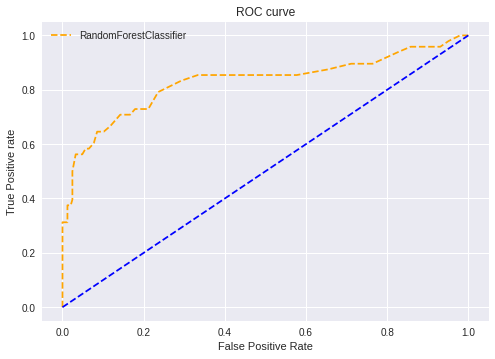

In [96]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [97]:
import joblib
joblib.dump(fianlRFC,"final model.pkl")

['final model.pkl']